<h2><center> <b>Table of Contents</b></center></h2>

* Table 1(#table1) <br>
* Figure 1(#fig1) <br>
* Figure 4(#fig4) <br>
    * Moving average of Daily new cases reported(#subsection1)
    * Moving average of Daily new deaths reported(#subsection2)
    * Moving average of Daily new tests taken(#subsection3)
* Figure 5(#fig5) <br>
    * OxCGRT indexes(#subsection4)
* Figure 6 (#fig6) <br>
* Figure 7 (#fig7)  <br>
    * Estimating of time-varying effective reproduction(#subsection0)
* Table 3 (#table3) <br>
    * Adfuller Testing to check if dataset is stationary or non stationary (#subsection5)
* Figure 8 (#fig8) <br>
    * Time-varying Regression using Flexible Least Square(FLS) method(#subsection6)
* Table 4(#table4) <br>
    * OLS regression for Containment Health index(#subsection7)
    * OLS regression for Government Resoponse Index(#subsection8)
    * OLS regression for Stringency Index(#subsection9)
* Table 5 (#table5)<br>
    * Regression anlysis for First wave of COVID-19(#subsection10)
    * Regression anlysis for Second wave of COVID-19(#subsection11)
* Table 6(#table6)<br>
    * Specific stepwise regression for Containment & Health Index(#subsection12)
* Table 7(#table7)<br>
    * Specific stepwise regression for Government Response Index(#subsection13)
* Table 8(#table8)<br>
    * Specific stepwise regression for Stringency Index(#subsection14)

In [1]:
# Importing neccesary libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
from datetime import datetime
import os

##  <a class="anchor"  id="table1">Table 1</a>

https://www.mohfw.gov.in/pdf/CummulativeCovidVaccinationReport06February2022.pdf

##  <a class="anchor"  id="fig1">Figure 1</a>


https://analytics.icmr.org.in/public/dashboard/149a9c89-de6d-4779-9326-5e8fed3323b6

## <a class="anchor"  id="fig4"> Figure 4 </a>

In [2]:
df=pd.read_csv('../input/covid-full-data/all-covid-data.csv',parse_dates=['date'])
df_covid_india=df[df["location"]=='India'].reset_index()
df_covid_india.replace(np.nan,0,inplace=True)


### <a class="anchor"  id="subsection1">Moving average of Daily new cases reported</a>

In [3]:
df_india_vaccines=df_covid_india.set_index('date')['new_cases'].rolling(window=7).mean().to_frame().reset_index(drop=True)
df_india_vaccines.columns=['7_days_Moving_Average']
df_india_vaccines.replace(np.nan,0,inplace=True)
df_india_vaccined=pd.concat([df_covid_india,df_india_vaccines],axis=1)

fig = px.line(df_india_vaccined, x="date", y=["new_cases",'7_days_Moving_Average'], title='Daily new cases reported in India')
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="daily Deaths reported",
    font=dict(
        family="Courier New, monospace",
        size=20,
        color="RebeccaPurple"
    )
)
fig.update_xaxes(tickangle=60)
fig.show()

### <a class="anchor"  id="subsection2"> Moving average of Daily deaths reported </a>

In [4]:
df_india_vaccines=df_covid_india.set_index('date')['new_deaths'].rolling(window=7).mean().to_frame().reset_index(drop=True)
df_india_vaccines.columns=['7_days_Moving_Average']
df_india_vaccines.replace(np.nan,0,inplace=True)
df_india_vaccined=pd.concat([df_covid_india,df_india_vaccines],axis=1)

fig = px.line(df_india_vaccined, x="date", y=["new_deaths",'7_days_Moving_Average'], title='Daily new deaths reported in India')
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="daily Deaths reported",
    font=dict(
        family="Courier New, monospace",
        size=20,
        color="RebeccaPurple"
    )
)
fig.update_xaxes(tickangle=60)
fig.show()

### <a class="anchor"  id="subsection3"> Moving average of Daily tests taken <a>

In [5]:
df_india_vaccines=df_covid_india.set_index('date')['new_tests'].rolling(window=7).mean().to_frame().reset_index(drop=True)
df_india_vaccines.columns=['7_days_Moving_Average']
df_india_vaccines.replace(np.nan,0,inplace=True)
df_india_vaccined=pd.concat([df_covid_india,df_india_vaccines],axis=1)

fig = px.line(df_india_vaccined, x="date", y=["new_tests",'7_days_Moving_Average'], title='Daily new tests taken in India')
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="daily tests administered",
    font=dict(
        family="Courier New, monospace",
        size=20,
        color="RebeccaPurple"
    )
)
fig.update_xaxes(tickangle=60)
fig.show()

In [6]:
df2=pd.read_csv('../input/govtresponsecovid/OxCGRT_latest_combined.csv')
df_india=df2[df2["CountryName"]=='India'].reset_index(drop=True)
df_india.replace(np.nan,0,inplace=True)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning:

Columns (2,3,39,41,43) have mixed types.Specify dtype option on import or set low_memory=False.



In [7]:
from datetime import datetime
df_india.Date=df_india.Date.apply(lambda x: datetime.strptime(str(x),"%Y%m%d"))

## <a class="anchor"  id="fig5"> Figure 5 </a>

### <a class="anchor"  id="subsection4"> OxCGRT indexes </a>

In [8]:
df_india['C_all']=df_india['C1_combined_numeric']+ df_india['C2_combined_numeric']+df_india['C3_combined_numeric']+df_india['C4_combined_numeric']+df_india['C5_combined_numeric']+df_india['C6_combined_numeric'] + df_india['C7_combined_numeric']+df_india['C8_combined_numeric']
df_india['E_all']=df_india['E1_combined_numeric']+  df_india['E2_combined_numeric'] 
df_india["H_all"]=df_india['H1_combined_numeric']+df_india['H2_combined_numeric']+df_india['H3_combined_numeric']+df_india['H6_combined_numeric']+df_india['H7_combined_numeric']+df_india['H8_combined_numeric']
df_india['S_all']=df_india['StringencyIndex']
df_india['G_all']=df_india['GovernmentResponseIndex']
df_india["CH_all"]=df_india['ContainmentHealthIndex']
df_india['ES_all']=df_india["EconomicSupportIndex"]

In [9]:
df_indicators=df_india[['Date',"E_all",'S_all',"G_all",'CH_all',"ES_all"]]
df_indicators

,Date,E_all,S_all,G_all,CH_all,ES_all
0,2020-01-01,0.0,0.0,0.0,0.0,0.0
1,2020-01-02,0.0,0.0,0.0,0.0,0.0
2,2020-01-03,0.0,0.0,0.0,0.0,0.0
3,2020-01-04,0.0,0.0,0.0,0.0,0.0
4,2020-01-05,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
754,2022-01-24,0.0,0.0,0.0,0.0,0.0
755,2022-01-25,0.0,0.0,0.0,0.0,0.0
756,2022-01-26,0.0,0.0,0.0,0.0,0.0
757,2022-01-27,0.0,0.0,0.0,0.0,0.0


In [10]:
fig = go.Figure(layout_title_text="NPI policies by Govt of India")
fig.add_trace(go.Scatter(x=df_indicators['Date'], y=df_indicators['E_all'],
                    mode='lines',
                    name='Economic Index'))

fig.add_trace(go.Scatter(x=df_indicators['Date'], y=df_indicators['S_all'],
                    mode='lines',
                    name='Stringency Index'))
fig.add_trace(go.Scatter(x=df_indicators['Date'], y=df_indicators['G_all'],
                    mode='lines', name='GovtResponse Index'))


fig.add_trace(go.Scatter(x=df_indicators['Date'], y=df_indicators['CH_all'],
                    mode='lines',
                    name='Containment&Health Index'))
fig.add_trace(go.Scatter(x=df_indicators['Date'], y=df_indicators['ES_all'],
                    mode='lines',
                    name='EconomicSupport Index'))
fig.show()

## <a class="anchor"  id="fig6"> Figure 6 </a>

In [11]:
## Un-comment each indicator to plot


fig = go.Figure()
# fig.add_trace(go.Scatter(x=df_india['Date'],y=df_india['C1_combined_numeric']))
# fig.add_trace(go.Scatter(x=df_india['Date'],y=df_india['C2_combined_numeric']))
# fig.add_trace(go.Scatter(x=df_india['Date'],y=df_india['C3_combined_numeric']))
# fig.add_trace(go.Scatter(x=df_india['Date'],y=df_india['C4_combined_numeric']))
# fig.add_trace(go.Scatter(x=df_india['Date'],y=df_india['C5_combined_numeric']))
# fig.add_trace(go.Scatter(x=df_india['Date'],y=df_india['C6_combined_numeric']))
# fig.add_trace(go.Scatter(x=df_india['Date'],y=df_india['C7_combined_numeric']))
# fig.add_trace(go.Scatter(x=df_india['Date'],y=df_india['C8_combined_numeric']))
# fig.add_trace(go.Scatter(x=df_india['Date'],y=df_india['E1_combined_numeric']))
# fig.add_trace(go.Scatter(x=df_india['Date'],y=df_india['E2_combined_numeric']))
# fig.add_trace(go.Scatter(x=df_india['Date'],y=df_india['H1_combined_numeric']))
# fig.add_trace(go.Scatter(x=df_india['Date'],y=df_india['H2_combined_numeric']))
# fig.add_trace(go.Scatter(x=df_india['Date'],y=df_india['H3_combined_numeric']))
# fig.add_trace(go.Scatter(x=df_india['Date'],y=df_india['H6_combined_numeric']))
# fig.add_trace(go.Scatter(x=df_india['Date'],y=df_india['H7_combined_numeric']))
fig.add_trace(go.Scatter(x=df_india['Date'],y=df_india['H8_combined_numeric']))
fig.update_layout(
    title='H8 Indicator',
    xaxis_title="Date",
    font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
    )
)
fig.update_xaxes(tickangle=60)
fig.show()

## <a class="anchor"  id="fig7"> Figure 7 </a>

### <a class="anchor"  id="subsection0"> Estimating of time-varying effective reproduction</a>

In [12]:
!pip install epyestim

In [13]:
import epyestim.covid19 as covid19

df_india_cases=df_covid_india.set_index("date")['new_cases']
si_dist=covid19.generate_standard_si_distribution()
df_stats=covid19.r_covid(df_india_cases, gt_distribution=si_dist,quantiles=(0.05, 0.5, 0.95))

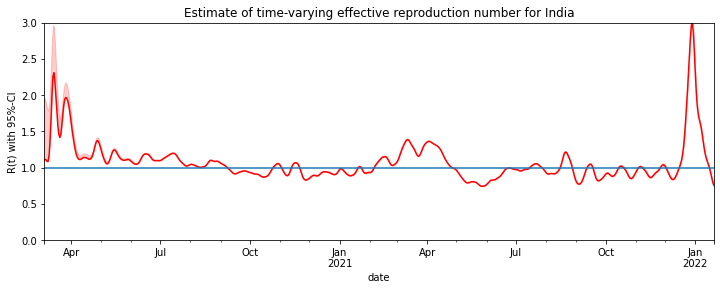

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))

df_stats.loc[:,'Q0.05'].plot(ax=ax, color='red')
ax.fill_between(df_stats.index, 
                    df_stats['Q0.05'], 
                    df_stats['Q0.95'], 
                    color='red', alpha=0.2)
ax.set_xlabel('date')
ax.set_ylabel('R(t) with 95%-CI')
ax.set_ylim([0,3])
ax.axhline(y=1)
ax.set_title('Estimate of time-varying effective reproduction number for India')
# plt.show()
plt.savefig('time.png')

## <a class="anchor"  id="table3"> Table 3 </a>

### <a class="anchor"  id="subsection5"> Adfuller Testing to check if dataset is stationary or non stationary </a>

In [15]:
import epyestim.covid19 as covid19

df_india_cases=df_india.set_index("Date")['ConfirmedCases']
si_dist=covid19.generate_standard_si_distribution()
df_stats=covid19.r_covid(df_india_cases, gt_distribution=si_dist,quantiles=(0.05, 0.5, 0.95))

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
print('Variable= Rt estimated by EpiEstim')
print('Sample_period= 4 march 2020 – 20 January 2022')
print(f'Obsv={df_stats.shape[0]}')
print(f'Mean= {df_stats["R_mean"].mean()}')
print(f'Std Dev ={df_stats["R_mean"].std()}')
print(f'Min={df_stats["R_mean"].min()}')
print(f'Max={df_stats["R_mean"].max()}')
result_rt=adfuller(df_stats["R_mean"].values)
print(f'ADF Statistic =  {result_rt[0]}')
print(f'p-value= {result_rt[1]}')
print(f'p-value= {result_rt[4]}')

Variable= Rt estimated by EpiEstim
Sample_period= 4 march 2020 – 20 January 2022
Obsv=714
Mean= 1.1196370579004946
Std Dev =0.3054717226901916
Min=0.7703751183291923
Max=4.3605681426373435
ADF Statistic =  -7.282295588912563
p-value= 1.4894832899190523e-10
p-value= {'1%': -3.4398214107097225, '5%': -2.8657196436385663, '10%': -2.5689957624690525}


In [18]:
print('Variable= GovernmentResponseIndex')
print('Sample_period= 1 January 2020 – 28 January 2022')
print(f'Obsv={df_india.shape[0]}')
print(f'Mean= {df_india["GovernmentResponseIndex"].mean()}')
print(f'Std Dev ={df_india["GovernmentResponseIndex"].std()}')
print(f'Min= {df_india["GovernmentResponseIndex"].min()}')
print(f'Max= {df_india["GovernmentResponseIndex"].max()}')

result_govt=adfuller(df_india['GovernmentResponseIndex'].values)
print(f'ADF Statistic=  {result_govt[0]}')
print(f'p-value={result_govt[1]}')

Variable= GovernmentResponseIndex
Sample_period= 1 January 2020 – 28 January 2022
Obsv=759
Mean= 61.32640316205557
Std Dev =19.64578198938514
Min= 0.0
Max= 89.84
ADF Statistic=  -1.9283919572634163
p-value=0.31882474885872464


In [19]:
print('Variable= ContainmentHealthIndex')
print('Sample_period= 1 January 2020 – 28 January 2022')
print(f'Obsv={df_india.shape[0]}')

print(f'Mean={df_india["ContainmentHealthIndex"].mean()}')
print(f'Std Dev= {df_india["ContainmentHealthIndex"].std()}')
print(f'Min= {df_india["ContainmentHealthIndex"].min()}')
print(f'Max= {df_india["ContainmentHealthIndex"].max()}')

result_containment=adfuller(df_india['ContainmentHealthIndex'].values)
print(f'ADF Statistic= {result_containment[0]}')
print(f'p-value= {result_containment[1]}')

Variable= ContainmentHealthIndex
Sample_period= 1 January 2020 – 28 January 2022
Obsv=759
Mean=64.65760210803676
Std Dev= 20.65389089934643
Min= 0.0
Max= 91.96
ADF Statistic= -1.9974404663037646
p-value= 0.28769649197401925


In [20]:
print('Variable= StringencyIndex')
print('Sample_period= 1 January 2020 – 28 January 2022')
print(f'Obsv={df_india.shape[0]}')

print(f'Mean={df_india["StringencyIndex"].mean()}')
print(f'Std Dev= {df_india["StringencyIndex"].std()}')
print(f'Min= {df_india["StringencyIndex"].min()}')
print(f'Max= {df_india["StringencyIndex"].max()}')

result_stringency=adfuller(df_india['StringencyIndex'].values)
print(f'ADF Statistic={result_stringency[0]}')
print(f'p-value={result_stringency[1]}')

Variable= StringencyIndex
Sample_period= 1 January 2020 – 28 January 2022
Obsv=759
Mean=65.27242424242448
Std Dev= 24.354855110762067
Min= 0.0
Max= 100.0
ADF Statistic=-2.6161766801945188
p-value=0.08969975484318637


## <a class="anchor"  id="fig8"> Figure 8 </a>

### <a class="anchor"  id="subsection6"> Time-varying Regression using Flexible Least Square(FLS) method</a>

In [21]:
df_india_data=df_india.iloc[35:-10]

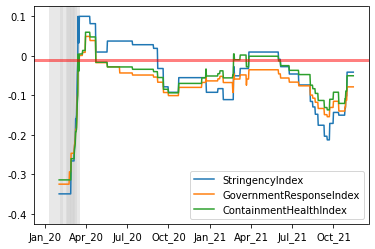

In [22]:
fig, ax = plt.subplots()
x=df_india_data['StringencyIndex']
y = np.sin(3 * np.pi * x)
# ax.plot( df_stats['R_mean'], y, color='black')

# use data coordinates for the x-axis and the axes coordinates for the y-axis
import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
theta = 0.9
beta=0.1
ax.plot(df_india_data.index,df_india_data['StringencyIndex'],label='StringencyIndex')
ax.plot(df_india_data.index,df_india_data['GovernmentResponseIndex'],label='GovernmentResponseIndex')
ax.plot(df_india_data.index,df_india_data['ContainmentHealthIndex'],label='ContainmentHealthIndex')

ax.axhline(78, color='red', lw=3, alpha=0.5)
ax.fill_between(df_india_data['StringencyIndex'], 0, 1, where=y > -theta,
                facecolor='#D3D3D3', alpha=0.5, transform=trans)
ax.legend()
plt.xticks([0, 100, 200,300,400,500,600,700],labels=['Jan_20','Apr_20','Jul_20','Oct_20','Jan_21','Apr_21','Jul_21','Oct_21'],rotation=0)
plt.yticks([0, 20, 40,60,80,100],labels=[-0.4,-0.3,-0.2,-0.1,0,0.1])
plt.savefig('lge.jpg')

## <a class="anchor"  id="table4"> Table 4 </a>

### <a class="anchor"  id="subsection7"> OLS regression for Containment Health Index </a>

In [23]:
import statsmodels.api as sm

x = df_india_data['ContainmentHealthIndex'].tolist()
y = df_stats['R_mean'].tolist()
  
# adding the constant term
x = sm.add_constant(x)
  
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
  
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     102.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           1.66e-22
Time:                        09:38:43   Log-Likelihood:                -118.09
No. Observations:                 714   AIC:                             240.2
Df Residuals:                     712   BIC:                             249.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6428      0.053     31.059      0.0

### <a class="anchor"  id="subsection8"> OLS regression for Government Resoponse Index </a>

In [24]:
x = df_india_data['GovernmentResponseIndex'].tolist()
y = df_stats['R_mean'].tolist()
  
# adding the constant term
x = sm.add_constant(x)
  
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
  
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     69.88
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           3.30e-16
Time:                        09:38:43   Log-Likelihood:                -132.47
No. Observations:                 714   AIC:                             268.9
Df Residuals:                     712   BIC:                             278.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5608      0.054     28.962      0.0

### <a class="anchor"  id="subsection9"> OLS regression for StringencyIndex </a>

In [25]:
x = df_india_data['StringencyIndex'].tolist()
y = df_stats['R_mean'].tolist()
  
# adding the constant term
x = sm.add_constant(x)
  
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
  
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     24.26
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           1.05e-06
Time:                        09:38:43   Log-Likelihood:                -153.93
No. Observations:                 714   AIC:                             311.9
Df Residuals:                     712   BIC:                             321.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3208      0.042     31.176      0.0

## <a class="anchor"  id="table5"> Table 5 </a>

### <a class="anchor"  id="subsection10"> Regression Analysis for First wave of COVID-19 </a>

In [26]:
df_first_wave_R=df_stats.loc["2020-03-04":"2020-09-04"]
df_first_wave_R

,cases,R_mean,R_var,Q0.05,Q0.5,Q0.95
2020-03-04,28.0,1.937916,1.808412e-02,1.720905,1.934904,2.164752
2020-03-05,30.0,1.912990,1.495758e-02,1.716974,1.910400,2.121955
2020-03-06,31.0,1.896438,1.237893e-02,1.718729,1.894318,2.084313
2020-03-07,34.0,1.826408,1.012179e-02,1.663408,1.824559,1.995163
2020-03-08,39.0,1.741734,8.268842e-03,1.595049,1.740139,1.894575
...,...,...,...,...,...,...
2020-08-31,3691166.0,1.088917,8.843470e-08,1.088428,1.088917,1.089406
2020-09-01,3769523.0,1.088403,8.653216e-08,1.087919,1.088403,1.088887
2020-09-02,3853406.0,1.087536,8.463907e-08,1.087057,1.087535,1.088014
2020-09-03,3936747.0,1.086587,8.279349e-08,1.086114,1.086587,1.087061


In [27]:
df_first_wave_I=df_india_data[28:213]

In [28]:
x = df_first_wave_I['StringencyIndex'].tolist()
y = df_first_wave_R['R_mean'].tolist()
  
# adding the constant term
x = sm.add_constant(x)
  
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
  
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     41.59
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           9.72e-10
Time:                        09:38:44   Log-Likelihood:                -4.9007
No. Observations:                 185   AIC:                             13.80
Df Residuals:                     183   BIC:                             20.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8897      0.093     20.331      0.0

In [29]:
x = df_first_wave_I['GovernmentResponseIndex'].tolist()
y = df_first_wave_R['R_mean'].tolist()
  
# adding the constant term
x = sm.add_constant(x)
  
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
  
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     39.82
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           2.05e-09
Time:                        09:38:44   Log-Likelihood:                -5.6360
No. Observations:                 185   AIC:                             15.27
Df Residuals:                     183   BIC:                             21.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9368      0.102     18.939      0.0

In [30]:
x = df_first_wave_I['ContainmentHealthIndex'].tolist()
y = df_first_wave_R['R_mean'].tolist()
  
# adding the constant term
x = sm.add_constant(x)
  
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
  
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     50.53
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           2.54e-11
Time:                        09:38:44   Log-Likelihood:                -1.2903
No. Observations:                 185   AIC:                             6.581
Df Residuals:                     183   BIC:                             13.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9650      0.095     20.688      0.0

### <a class="anchor"  id="subsection11"> Regression anlysis for Second wave of COVID-19 </a>

In [31]:
df_second_wave_R=df_stats.loc['2021-03-01':'2021-08-31']

In [32]:
df_second_wave_I=df_india.iloc[425:609]

In [33]:
x = df_second_wave_I['ContainmentHealthIndex'].tolist()
y = df_second_wave_R['R_mean'].tolist()
  
# adding the constant term
x = sm.add_constant(x)
  
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
  
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     7.605
Date:                Tue, 08 Feb 2022   Prob (F-statistic):            0.00641
Time:                        09:38:45   Log-Likelihood:                 403.93
No. Observations:                 184   AIC:                            -803.9
Df Residuals:                     182   BIC:                            -797.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9190      0.038     24.048      0.0

In [34]:
x = df_second_wave_I['GovernmentResponseIndex'].tolist()
y = df_second_wave_R['R_mean'].tolist()
  
# adding the constant term
x = sm.add_constant(x)
  
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
  
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     5.882
Date:                Tue, 08 Feb 2022   Prob (F-statistic):             0.0163
Time:                        09:38:45   Log-Likelihood:                 403.09
No. Observations:                 184   AIC:                            -802.2
Df Residuals:                     182   BIC:                            -795.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1501      0.052     22.147      0.0

In [35]:
x = df_second_wave_I['StringencyIndex'].tolist()
y = df_second_wave_R['R_mean'].tolist()
  
# adding the constant term
x = sm.add_constant(x)
  
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
  
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     6.312
Date:                Tue, 08 Feb 2022   Prob (F-statistic):             0.0129
Time:                        09:38:45   Log-Likelihood:                 403.30
No. Observations:                 184   AIC:                            -802.6
Df Residuals:                     182   BIC:                            -796.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0696      0.018     58.927      0.0

## <a class="anchor"  id="table6"> Table 6 </a>

### <a class="anchor"  id="subsection12"> Specific stepwise regression for containment and health </a>

In [36]:
list_health=['C1',"C2","C3",'C4','C5',"C6","C8","H2","H3","H6","H7",'H8']


for i in list_health:
    x = df_india_data[i + "_combined_numeric"].tolist()    
    y=df_india_data['ContainmentHealthIndex'] * (-0.0077)
    y=y.tolist()

    # adding the constant term
    x = sm.add_constant(x)

    # performing the regression
    # and fitting the model
    result = sm.OLS(y, x).fit()

    # printing the summary table
    print(f"{i}",result.summary())
    print()
    print()
    print()

C1                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     616.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           1.54e-98
Time:                        09:38:45   Log-Likelihood:                 792.41
No. Observations:                 714   AIC:                            -1581.
Df Residuals:                     712   BIC:                            -1572.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3503      0.008    -45.263      

## <a class="anchor"  id="table7"> Table 7 </a>

### <a class="anchor"  id="subsection13"> Specific stepwise regression for Government Response Index </a>

In [37]:
list_govt=['C1',"C3",'C5',"C6","C7","C8","H2","H3","H6","H7",'H8','E1','E2']
for i in list_govt:
    x = df_india_data[i + "_combined_numeric"].tolist()    
    y=df_india_data['GovernmentResponseIndex'] * (-0.0069)
    y=y.tolist()

    # adding the constant term
    x = sm.add_constant(x)

    # performing the regression
    # and fitting the model
    result = sm.OLS(y, x).fit()

    # printing the summary table
    print(f"{i}",result.summary())
    print()
    print()
    print()

C1                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     754.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          7.26e-114
Time:                        09:38:46   Log-Likelihood:                 942.56
No. Observations:                 714   AIC:                            -1881.
Df Residuals:                     712   BIC:                            -1872.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2895      0.006    -46.174      

## <a class="anchor"  id="table8"> Table 8 </a>

### <a class="anchor"  id="subsection14"> Specific stepwise regression for Stringency Index </a>

In [38]:
list_str=['C1',"C2",'C3',"C5","C6","C7","C8"]


for i in list_str:
    x = df_india_data[i + "_combined_numeric"].tolist()    
    y=df_india_data['StringencyIndex'] * (-0.0030)
    y=y.tolist()

    # adding the constant term
    x = sm.add_constant(x)

    # performing the regression
    # and fitting the model
    result = sm.OLS(y, x).fit()

    # printing the summary table
    print(f"{i}",result.summary())
    print()
    print()

C1                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     1229.
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.34e-157
Time:                        09:38:46   Log-Likelihood:                 1387.7
No. Observations:                 714   AIC:                            -2771.
Df Residuals:                     712   BIC:                            -2762.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0990      0.003    -29.451      